In [1]:
from wv_utils import angle_between, reduce_dimensions
from note_reader import get_notes_as_pitch_classes
from gensim.models import Word2Vec, FastText
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"

In [3]:
file_list = glob.glob("data/txt/*.txt")

In [4]:
docs, counts = get_notes_as_pitch_classes(file_list)

In [5]:
pitches_sorted = counts.most_common()
pitches, pitch_counts = zip(*pitches_sorted)

In [6]:
THRESHOLD = 20

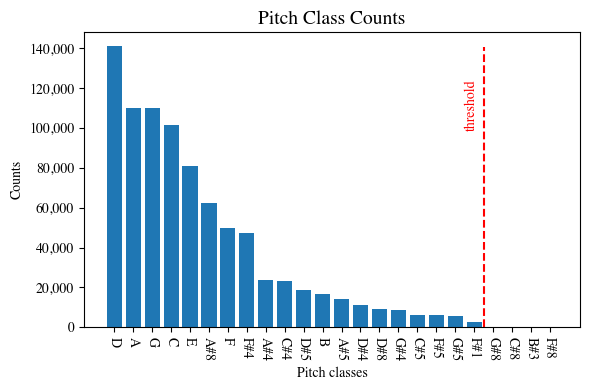

In [7]:
fig = plt.figure(figsize=(6, 4))
plt.title("Pitch Class Counts", fontdict={"fontsize": 14})
plt.xlabel("Pitch classes")
plt.xticks(rotation=-90)
plt.ylabel("Counts")
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.bar(pitches, pitch_counts)
plt.tight_layout()
plt.axvline(x=THRESHOLD-0.5, ymax=0.95, color="r", linestyle="--")
plt.text(THRESHOLD-1.5, 100000, "threshold", rotation=90, color="r")
plt.show()

In [8]:
common_pitches = [x[0] for x in counts.most_common(THRESHOLD)]
common_docs = []
for doc in docs:
    common_doc = [x if x in common_pitches else UNK_TAG for x in doc]
    common_docs.append(common_doc)

# Word2Vec model


In [9]:
w2v_model = Word2Vec(sentences=common_docs,
                     vector_size=10, epochs=100, window=7)
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"], topn=3)  # D

[('D', 0.5901919007301331),
 ('A#8', 0.5654453039169312),
 ('E', 0.3871384561061859)]

In [10]:
w2v_model.wv.most_similar("G")

[('F#4', 0.7001728415489197),
 ('D#5', 0.41719743609428406),
 ('D#8', 0.29042720794677734),
 ('D#4', 0.2865954041481018),
 ('A#4', 0.2852426767349243),
 ('G#5', 0.2821482717990875),
 ('C#4', 0.11708121746778488),
 ('A', 0.09194787591695786),
 ('A#5', 0.060539938509464264),
 ('G#4', 0.04537166282534599)]

In [11]:
w2v_model.wv.similarity("G", "A")

0.09194789

# FastText model


In [12]:
ft_model = FastText(sentences=common_docs,
                    vector_size=10, epochs=100, window=5)
ft_model.wv.most_similar(positive=["C", "A"], negative=["G"])  # D

[('A#8', 0.578978419303894),
 ('D', 0.5789409875869751),
 ('C#5', 0.3586275577545166),
 ('B', 0.2908475697040558),
 ('E', 0.2343147099018097),
 ('F#1', 0.05128666013479233),
 ('A#4', -0.08979343622922897),
 ('C#4', -0.09919346123933792),
 ('F#5', -0.15152961015701294),
 ('A#5', -0.2130511850118637)]

In [13]:
angles_dict = {}
for current in ft_model.wv.key_to_index:
    # if current == UNK_TAG:
    #     continue

    angles_dict[current] = {}
    for pitch in ft_model.wv.key_to_index:
        # if pitch == UNK_TAG:
        #     continue

        angle = round(angle_between(
            ft_model.wv[current], ft_model.wv[pitch]), 2)
        angles_dict[current][pitch] = angle

df = pd.DataFrame.from_dict(angles_dict)
# df.to_excel("results/angles.xlsx")

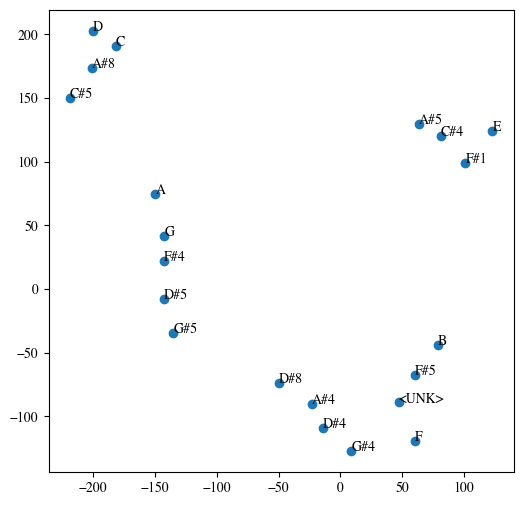

In [14]:
x_vals, y_vals, labels = reduce_dimensions(ft_model)
plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals)

for i in range(len(labels)):
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))